
#  Training Complex CNN architectures.

We will build and train a convolutional network on CIFAR-10 dataset. We will use popular Lenet architecture.



Load all the necessary packages

In [0]:
import numpy as np
import os
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu,floatX=float32"
#import theano
import keras

from keras.datasets import cifar10
from keras.models  import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

## Train on CIFAR-10 dataset

#### Load CIFAR 10 dataset.

CIFAR-10 is the widely used dataset in deep learning community to benchmark, validate and evaluate any new findings.
CIFAR-10 dataset contains around 60k images belonging to 10 classes. It contains 50k training and 10k test images. The dataset is available at http://www.cs.toronto.edu/~kriz/cifar.html . Please visit the webpage to know more about the dataset.




In [39]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Training data:")
print( "Number of examples: ", X_train.shape[0])
print( "Number of channels:",X_train.shape[3] )
print( "Image size:", X_train.shape[1], X_train.shape[2])
print("\n")
print( "Test data:")
print( "Number of examples:", X_test.shape[0])
print( "Number of channels:", X_test.shape[3])
print( "Image size:",X_test.shape[1], X_test.shape[2]) 

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32


Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


#### Visualize some images from CIFAR-10 dataset. 
It contains 10 classes namely, airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

(288, 320, 3) 255 0


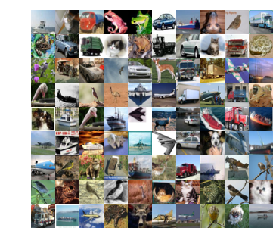

In [41]:
plot = []
for i in range(1,10):
    plot_image = X_train[100*i,:,:,:]
    for j in range(1,10):
        plot_image = np.concatenate((plot_image, X_train[100*i+j,:,:,:]), axis=1)
    if i==1:
        plot = plot_image
    else:
        plot = np.append(plot, plot_image, axis=0)
print(plot.shape, np.max(plot), np.min(plot))
plt.imshow(plot/255)
plt.axis('off')
plt.show()

#### Normalize the data.

In [42]:
print("mean before normalization:", np.mean(X_train)) 
print("std before normalization:", np.std(X_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)
for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])
    
for i in range(3):
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
    
X_train = newX_train
X_test = newX_test

print("mean after normalization:", np.mean(X_train))
print("std after normalization:", np.std(X_train))

mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213
mean after normalization: 4.91799193961621e-17
std after normalization: 0.9999999999999996


#### Specify Training Parameters

In [0]:
batchSize = 50                    #-- Training Batch Size
num_classes = 10                  #-- Number of classes in CIFAR-10 dataset
num_epochs = 10                   #-- Number of epochs for training   
learningRate= 0.001               #-- Learning rate for the network
lr_weight_decay = 0.95            #-- Learning weight decay. Reduce the learn rate by 0.95 after epoch


img_rows, img_cols = 32, 32       #-- input image dimensions

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

#### Lets build a CNN network (LeNet) in Theano Keras and train on CIFAR-10 dataset.

In [44]:
model = Sequential()                                                #-- Sequential container.

model.add(Convolution2D(6, 5, 5,                                    #-- 6 outputs (6 filters), 5x5 convolution kernel
                        border_mode='valid',
                        input_shape=( img_rows, img_cols, 3)))       #-- 3 input depth (RGB)
model.add(Activation('relu'))                                       #-- ReLU non-linearity 
model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows
model.add(Convolution2D(16, 5, 5))                                  #-- 16 outputs (16 filters), 5x5 convolution kernel
model.add(Activation('relu'))                                       #-- ReLU non-linearity
model.add(MaxPooling2D(pool_size=(2, 2)))                           #-- A max-pooling on 2x2 windows

model.add(Flatten())                                                #-- eshapes a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
model.add(Dense(120))                                               #-- 120 outputs fully connected layer
model.add(Activation('relu'))                                       #-- ReLU non-linearity 
model.add(Dense(84))                                                #-- 84 outputs fully connected layer
model.add(Activation('relu'))                                       #-- ReLU non-linearity 
model.add(Dense(num_classes))                                       #-- 10 outputs fully connected layer (one for each class)
model.add(Activation('softmax'))                                    #-- converts the output to a log-probability. Useful for classification problems

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_7 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(32, 32, 3..., padding="valid")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5))`
  


#### Compile and then train the network

In [47]:
sgd = SGD(lr=learningRate, decay = lr_weight_decay)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#-- switch verbose=0 if you get error "I/O operation from closed file"
history = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs,
          verbose=1, shuffle=True, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
34450/50000 [===================>..........] - ETA: 17s - loss: 1.4507 - acc: 0.4732

50000/50000 [==============================] - 61s 1ms/step - loss: 1.4421 - acc: 0.4792 - val_loss: 1.3901 - val_acc: 0.4973
Epoch 2/10
16700/50000 [=========>....................] - ETA: 37s - loss: 1.3771 - acc: 0.5029

50000/50000 [==============================] - 61s 1ms/step - loss: 1.3682 - acc: 0.5097 - val_loss: 1.3527 - val_acc: 0.5157
Epoch 3/10
 9950/50000 [====>.........................] - ETA: 44s - loss: 1.3293 - acc: 0.5260

50000/50000 [==============================] - 61s 1ms/step - loss: 1.3113 - acc: 0.5297 - val_loss: 1.3250 - val_acc: 0.5272
Epoch 4/10
 7400/50000 [===>..........................] - ETA: 47s - loss: 1.2698 - acc: 0.5447

50000/50000 [==============================] - 61s 1ms/step - loss: 1.2606 - acc: 0.5517 - val_loss: 1.2455 - val_acc: 0.5584
Epoch 5/10
 6400/50000 [==>...........................] - ETA: 48s - loss: 1.2180 - acc: 0.5570

50000/50000 [==============================] - 61s 1ms/step - loss: 1.2166 - acc: 0.5683 - val_loss: 1.2783 - val_acc: 0.5566
Epoch 6/10
 6050/50000 [==>...........................] - ETA: 49s - loss: 1.1834 - acc: 0.5739

50000/50000 [==============================] - 61s 1ms/step - loss: 1.1775 - acc: 0.5839 - val_loss: 1.2054 - val_acc: 0.5757
Epoch 7/10
 5900/50000 [==>...........................] - ETA: 48s - loss: 1.1455 - acc: 0.5902

50000/50000 [==============================] - 61s 1ms/step - loss: 1.1444 - acc: 0.5969 - val_loss: 1.1836 - val_acc: 0.5846
Epoch 8/10
 5850/50000 [==>...........................] - ETA: 49s - loss: 1.1057 - acc: 0.6147

50000/50000 [==============================] - 61s 1ms/step - loss: 1.1160 - acc: 0.6089 - val_loss: 1.1718 - val_acc: 0.5895
Epoch 9/10
 5850/50000 [==>...........................] - ETA: 49s - loss: 1.0813 - acc: 0.6263

50000/50000 [==============================] - 61s 1ms/step - loss: 1.0879 - acc: 0.6172 - val_loss: 1.1437 - val_acc: 0.6028
Epoch 10/10
 5800/50000 [==>...........................] - ETA: 49s - loss: 1.0663 - acc: 0.6271

50000/50000 [==============================] - 61s 1ms/step - loss: 1.0628 - acc: 0.6287 - val_loss: 1.1326 - val_acc: 0.6047


#### Print the scores

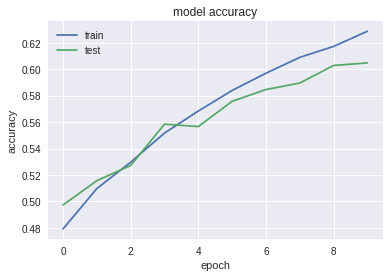

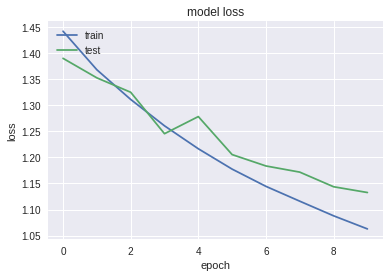

In [48]:
#-- summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#-- summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
#-- test the network
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 1.1326242254257202
Test accuracy: 0.6047


#### save the model

In [0]:
#cifar10_weights = model.get_weights()
#np.savez("cifar10_weights_new", cifar10_weights = cifar10_weights)


** Q1: [0.5 point] **

What are the number of parameters in convolution layers with K filters each of size 3*w*h.

** Q2: [0.5 points] ** 

What are the number of parameters in a max pooling operation? 

**Q3: [0.5 point]**

Which of the operations contain most number of parameters?
      (a) conv (b) pool (c) Fully connected layer (FC) (d) Relu 

**Q4: [0.5 point]**

Which operation consume most amount of memory?
     (a) initial convolution layers (b) fully connected layers at the end

** Q5: [2 points] **

Experiment with **learning rate** (learningRate) and notice the behaviour of the learning process. Plot your observations in a graph with brief explanation.
Take the values on a log scale. Vary only one parameter at a time.


** Q6: [2 points] **

Currently, the **batch-size** is 50. Notice the training loss curve if batch size is changed to 1. Is it smooth or fluctating? Show the effect of batch-size on the learning curves in a plot.
Take the values on a log scale. Vary only one parameter at a time.

** Q7: [2 points] **

Increase the **number of convolution filters** and experiment. Present your observations using plots and brief explanations.
Take the values on a log scale. Vary only one parameter at a time.

** Q8: [2 points] **

What do you observe if you increase the **number of layers** (depth of the network) ? Present your observations using plots and brief explanations. 

** Q9: [2 points] **

What do you observe if you increase the **activation functions** (tanh, relu, sigmoid) ? Present your observations using plots and brief explanations. 

** Q10: [1 points] **

CNN training requires lot of training data. In the absence of large training data, a common practice is to use synthetic data using operations such as flipping, scaling, etc. Can you think of any other two operations techniques that can help to increase the training set? Demonstrate these effects with sufficient explanation.



```
This code is a modified version of the code from Deep-Learning School which took place at IIIT-Hyd in Summers 2017 and Summers 2016
```
